# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# Reading training

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [3]:
training=pd.read_csv("data/kddcup.data_10_percent_corrected.csv",header=None,names=col_names)

In [4]:
training.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
training["label"].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [ ]:
normal attack

# EDA

In [4]:
training.loc[:,"label"]=training.loc[:,"label"].apply(lambda x: x.replace(".",""))

In [5]:
training.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

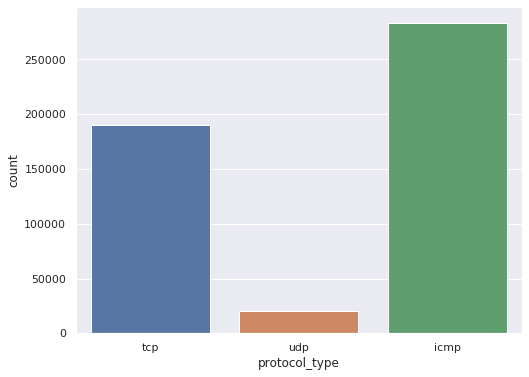

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x=training.iloc[:,1]);

### from the figure above we can see that the most protocol used  is ICMP 

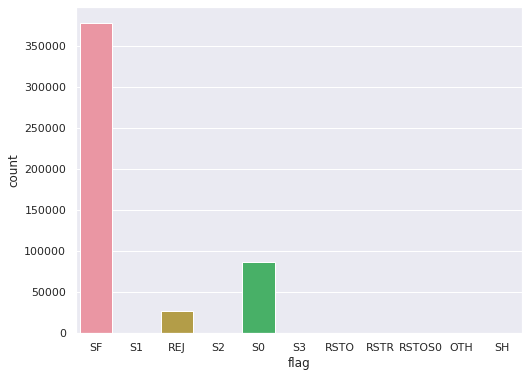

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x=training.iloc[:,3]);

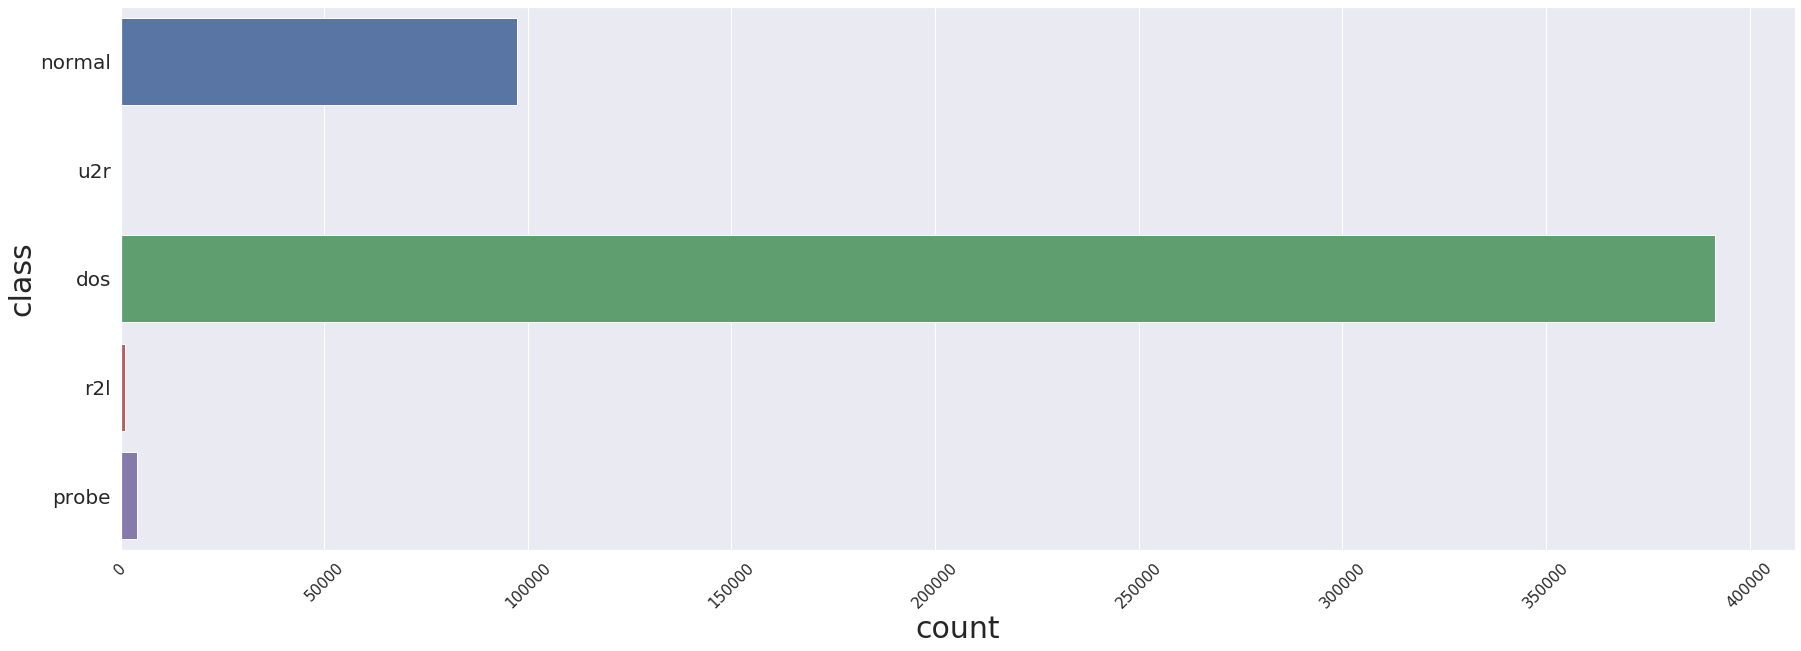

In [40]:
plt.figure(figsize=(30,10))
sns.countplot(y=training["class"]);
plt.xlabel("count",fontsize=30);
plt.ylabel("class",fontsize=30);

plt.xticks(fontsize=15,rotation=45);
plt.yticks(fontsize=20,rotation=0);

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(y=testing.iloc[:,41]);
plt.xlabel("count",fontsize=30);
plt.ylabel("Label",fontsize=30);

plt.xticks(fontsize=15,rotation=45);
plt.yticks(fontsize=20,rotation=0);

NameError: name 'testing' is not defined

<Figure size 2160x720 with 0 Axes>

In [13]:
training.iloc[:,41].value_counts()

smurf              280790
neptune            107201
normal              97278
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [6]:
num_feat=[]
for i in training.columns:
    if training[i].dtype=="float64" or training[i].dtype=="int64":
        num_feat.append(i)
    

In [7]:
num_feat

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [8]:
training[num_feat]=training[num_feat].astype("float64")

In [18]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311029 entries, 0 to 311028
Data columns (total 42 columns):
duration                       311029 non-null float64
protocol_type                  311029 non-null object
service                        311029 non-null object
flag                           311029 non-null object
src_bytes                      311029 non-null float64
dst_bytes                      311029 non-null float64
land                           311029 non-null float64
wrong_fragment                 311029 non-null float64
urgent                         311029 non-null float64
hot                            311029 non-null float64
num_failed_logins              311029 non-null float64
logged_in                      311029 non-null float64
num_compromised                311029 non-null float64
root_shell                     311029 non-null float64
su_attempted                   311029 non-null float64
num_root                       311029 non-null float64
num_file_cre

In [19]:
training.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
scale=StandardScaler()
training[num_feat]=scale.fit_transform(training[num_feat].values)


In [12]:
num_feat

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [22]:
training.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.066833,tcp,http,SF,-0.001720,0.068188,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.786510,-1.833023,-0.282939,-1.257937,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal
1,-0.066833,tcp,http,SF,-0.001777,0.005325,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.777069,0.598967,-0.282939,0.821119,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal
2,-0.066833,tcp,http,SF,-0.001698,0.000208,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.767627,0.598967,-0.282939,-0.218409,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal
3,-0.066833,tcp,http,SF,-0.001701,0.001455,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.758185,0.598967,-0.282939,-0.571848,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal
4,-0.066833,tcp,http,SF,-0.001695,-0.000942,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.748744,0.598967,-0.282939,-0.738173,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal


In [10]:
protocol_label=LabelEncoder()
training["protocol_type"]=protocol_label.fit_transform(training["protocol_type"])
training.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.067792,1,http,SF,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.694315,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
1,-0.067792,1,http,SF,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
2,-0.067792,1,http,SF,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
3,-0.067792,1,http,SF,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal
4,-0.067792,1,http,SF,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.317100,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal


In [11]:
service_label=LabelEncoder()
training["service"]=service_label.fit_transform(training["service"])

In [16]:
training.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,22,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,22,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,22,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,22,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,22,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [27]:
training["flag"].unique()

array(['SF', 'S2', 'S1', 'S3', 'OTH', 'REJ', 'RSTO', 'S0', 'RSTR',
       'RSTOS0', 'SH'], dtype=object)

In [12]:
flag_label=LabelEncoder()
training["flag"]=flag_label.fit_transform(training["flag"])

In [29]:
training.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.066833,1,24,9,-0.001720,0.068188,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.786510,-1.833023,-0.282939,-1.257937,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal
1,-0.066833,1,24,9,-0.001777,0.005325,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.777069,0.598967,-0.282939,0.821119,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal
2,-0.066833,1,24,9,-0.001698,0.000208,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.767627,0.598967,-0.282939,-0.218409,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal
3,-0.066833,1,24,9,-0.001701,0.001455,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.758185,0.598967,-0.282939,-0.571848,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal
4,-0.066833,1,24,9,-0.001695,-0.000942,-0.002391,-0.015139,-0.001103,-0.026521,...,-1.748744,0.598967,-0.282939,-0.738173,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,normal


In [24]:
training["label"]

0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494016    normal.
494017    normal.
494018    normal.
494019    normal.
494020    normal.
Name: label, Length: 494021, dtype: object

In [13]:
training["label"]=training["label"].apply(lambda x: "attack" if x != "normal" else "normal")

In [38]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

training.head(300)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,class
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.0,0.0,normal,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.0,0.0,normal,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.0,0.0,normal,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.0,0.0,normal,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.0,0.0,normal,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.0,0.0,normal,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.0,0.0,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0.04,0.00,0.00,0.0,0.0,normal,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.0,0.0,1.00,0.00,0.00,11,79,1.00,0.00,0.09,0.04,0.00,0.00,0.0,0.0,normal,normal
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.00,0.00,0.00,8,89,1.00,0.00,0.12,0.04,0.00,0.00,0.0,0.0,normal,normal
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.00,0.00,0.00,8,99,1.00,0.00,0.12,0.05,0.00,0.00,0.0,0.0,normal,normal


In [ ]:
dos=["syn flood"]

In [84]:
training["label"].unique()

array(['normal', 'attack'], dtype=object)

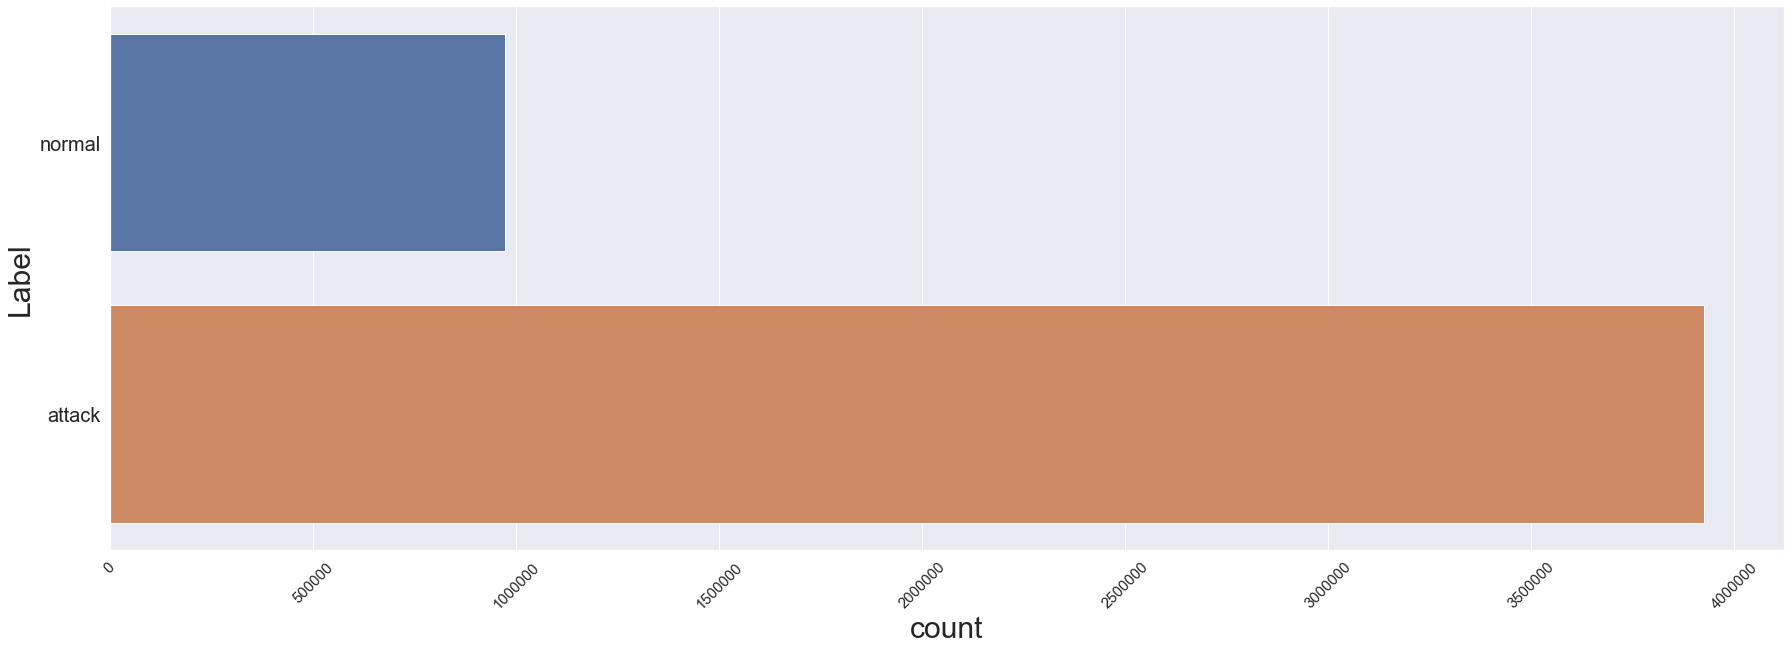

In [34]:
plt.figure(figsize=(30,10))
sns.countplot(y=training.iloc[:,41]);
plt.xlabel("count",fontsize=30);
plt.ylabel("Label",fontsize=30);

plt.xticks(fontsize=15,rotation=45);
plt.yticks(fontsize=20,rotation=0);

In [16]:
label_label=LabelEncoder()
training["label"]=label_label.fit_transform(training["label"])
training.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.067792,1,22,9,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.694315,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1
1,-0.067792,1,22,9,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1
2,-0.067792,1,22,9,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1
3,-0.067792,1,22,9,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1
4,-0.067792,1,22,9,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.317100,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1


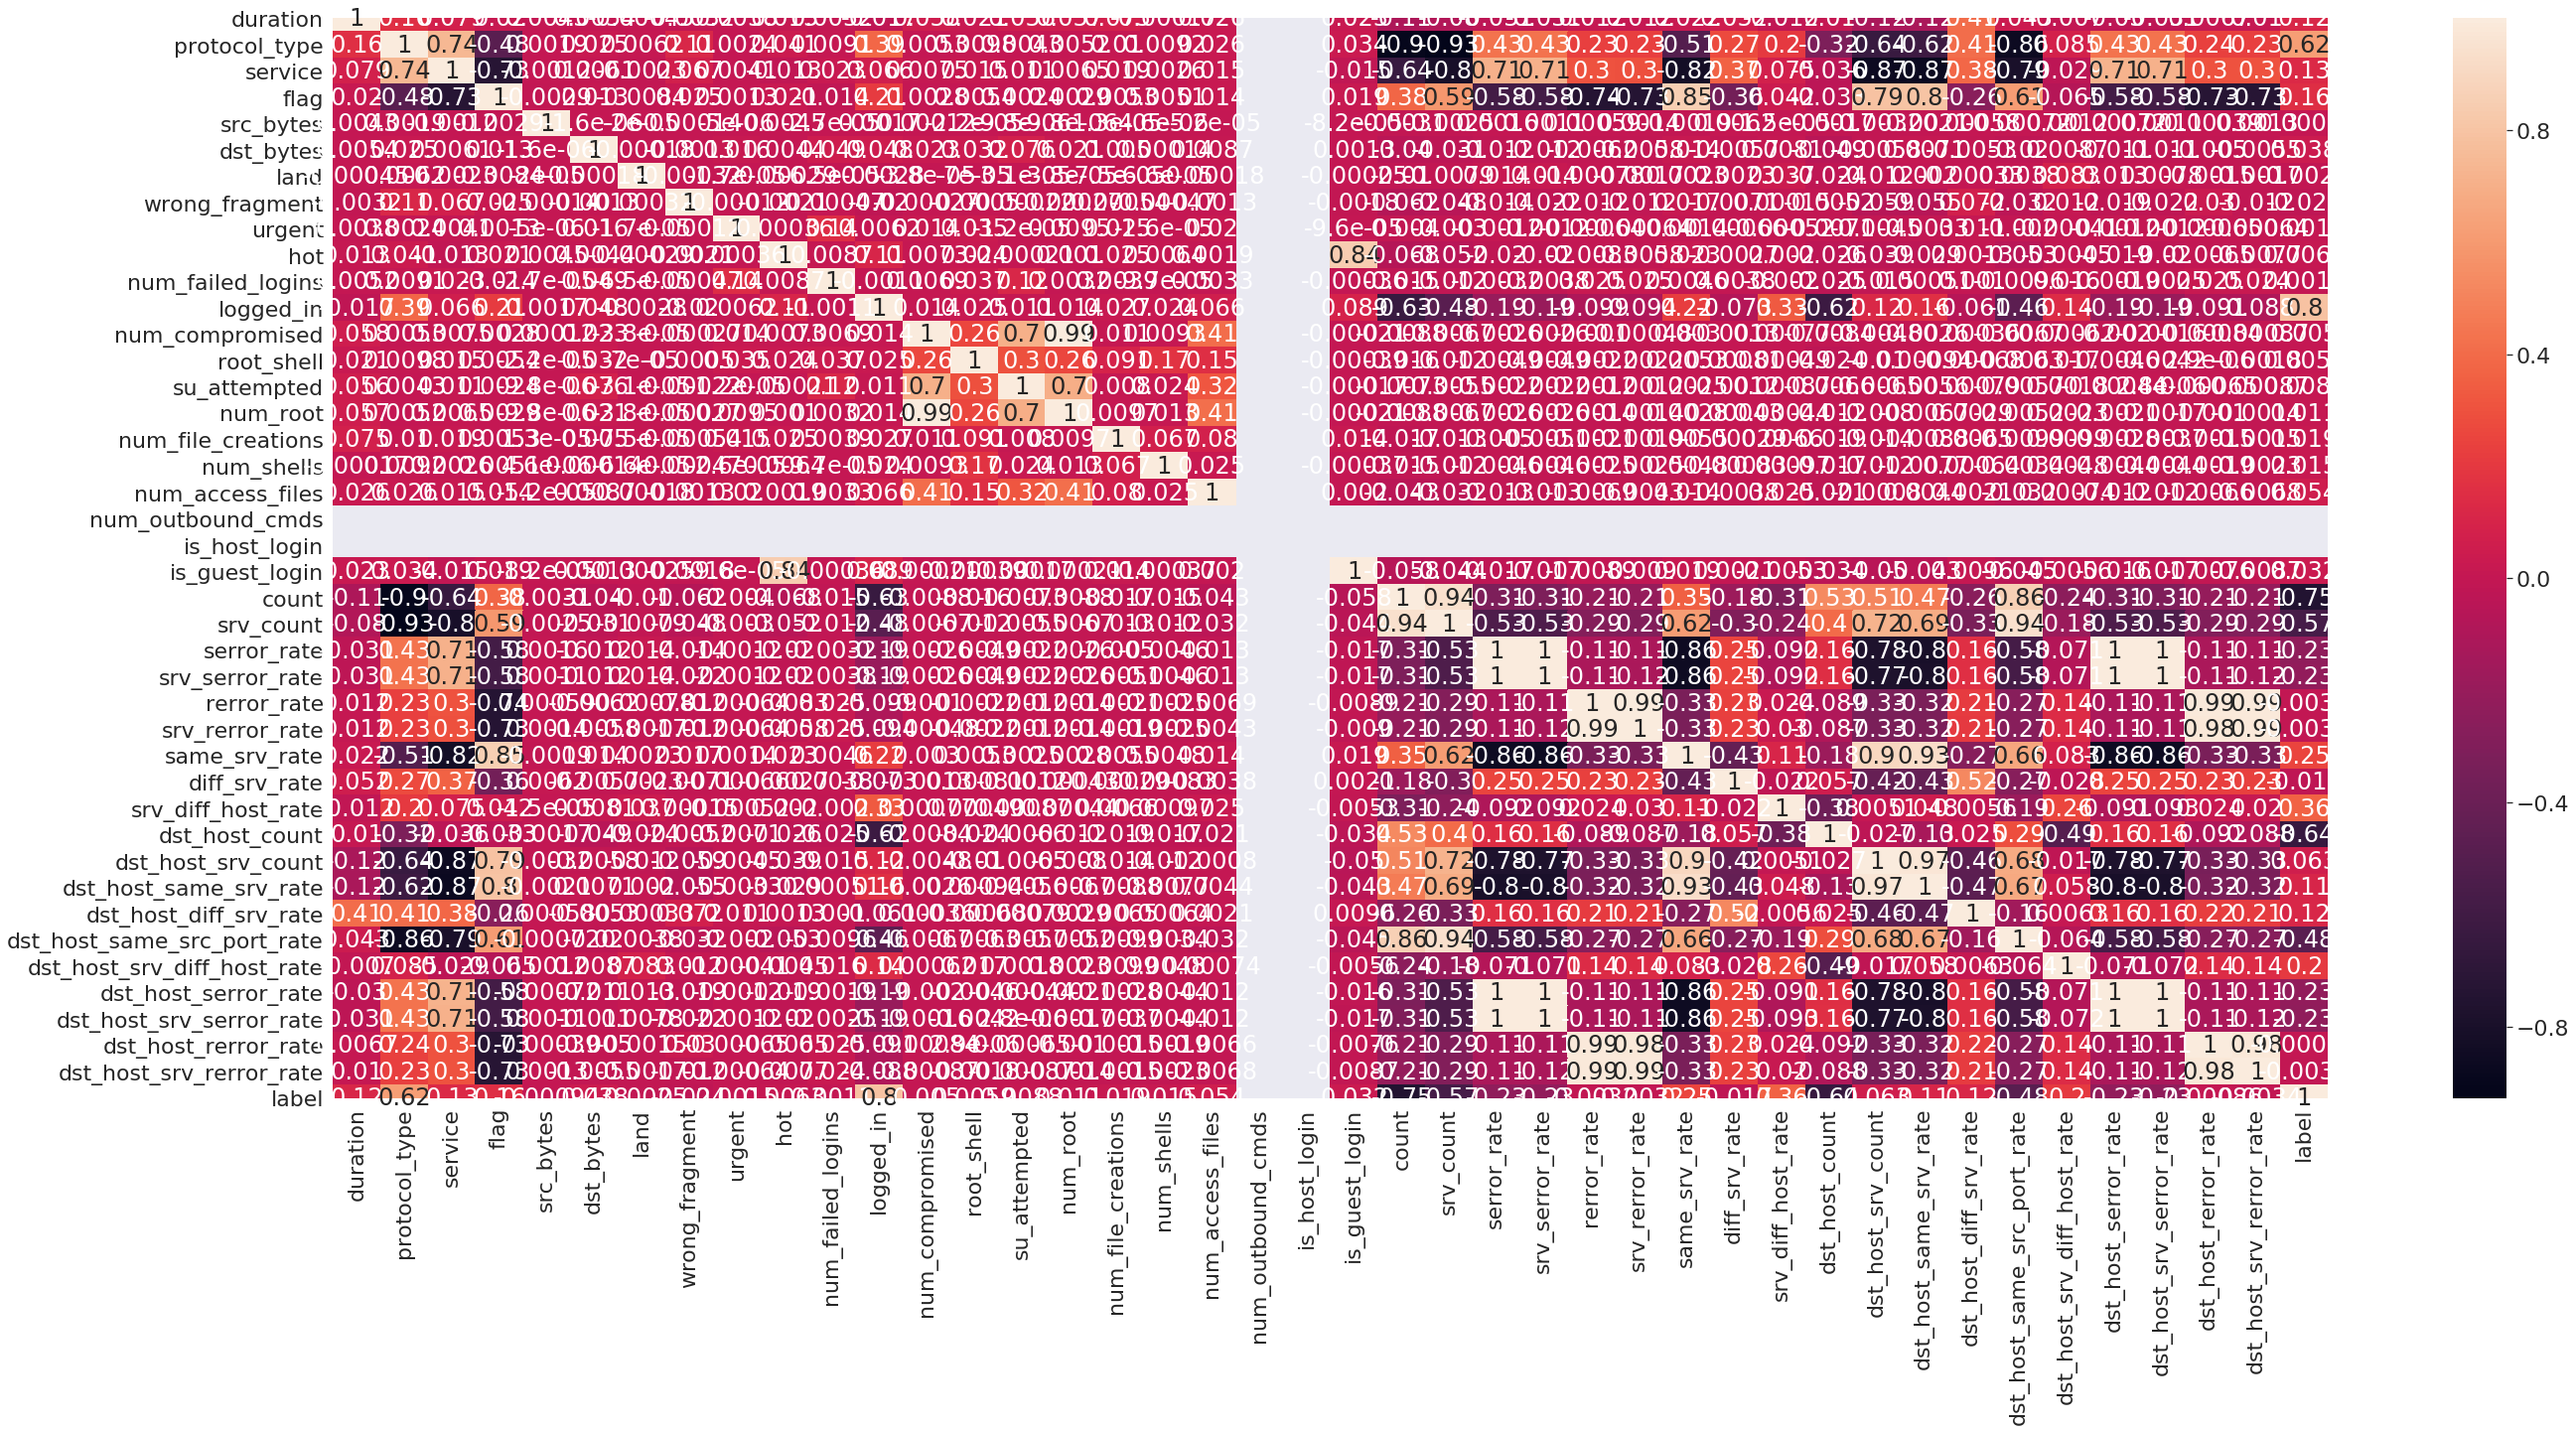

In [17]:
plt.figure(figsize=(45,20))
sns.set(font_scale=2.0)
plt.tight_layout()
ax0 = plt.axes()
sns.heatmap(training.corr(),annot=True);

In [18]:
training.corr()["label"].sort_values(ascending=False)[1:]

logged_in                      0.795282
protocol_type                  0.616601
srv_diff_host_rate             0.364687
same_srv_rate                  0.247405
dst_host_srv_diff_host_rate    0.204958
flag                           0.155672
service                        0.131723
duration                       0.118014
dst_host_diff_srv_rate         0.115901
dst_host_same_srv_rate         0.109950
dst_host_srv_count             0.062566
num_access_files               0.054268
dst_bytes                      0.037709
is_guest_login                 0.032299
num_file_creations             0.018671
num_shells                     0.014951
num_root                       0.011006
su_attempted                   0.008789
hot                            0.006327
root_shell                     0.005871
num_compromised                0.005046
urgent                         0.001498
num_failed_logins              0.001060
dst_host_rerror_rate          -0.000860
src_bytes                     -0.000936


In [19]:
training.drop("num_outbound_cmds",axis=1,inplace=True)
training.drop("is_host_login",axis=1,inplace=True)

In [20]:
print(len(training))
training.drop_duplicates(subset=None, keep='first', inplace=True)
print(len(training))


494021
145585


In [21]:
X=training.drop("label",axis=1).values
y=training["label"].values

In [24]:
X_train, X_validate, y_train, y_validate = train_test_split( X, y, test_size=0.20, random_state=42)

In [25]:
X_train

array([[-0.06779172,  1.        , 22.        , ..., -0.4369501 ,
        -0.25203952, -0.249464  ],
       [-0.06779172,  1.        ,  9.        , ..., -0.46320239,
         4.08467564,  4.09571547],
       [-0.06779172,  1.        , 22.        , ..., -0.46320239,
        -0.25203952, -0.249464  ],
       ...,
       [-0.06779172,  1.        , 19.        , ...,  2.16202721,
        -0.25203952, -0.249464  ],
       [-0.06779172,  1.        , 40.        , ..., -0.46320239,
         4.08467564,  4.09571547],
       [-0.06779172,  1.        , 19.        , ..., -0.46320239,
        -0.25203952, -0.249464  ]])

In [26]:
rfc=RandomForestClassifier().fit(X_train,y_train)

In [27]:
y_train

array([1, 0, 1, ..., 0, 0, 1])

In [29]:
rfc_pred=rfc.predict(X_validate)

In [30]:
rfc_fscore=f1_score(y_validate,rfc_pred)
print("F1-Score For Random Forrest is: {:.4f}".format(rfc_fscore))

F1-Score For Random Forrest is: 0.9994


In [32]:
rfc_conf=confusion_matrix(y_validate,rfc_pred)
print("Confusion Matrix for RandomForestClassifier is : ",rfc_conf)

Confusion Matrix for RandomForestClassifier is :  [[11513    11]
 [    9 17584]]


In [ ]:
knn=KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
knn_pred=knn.predict(X_validate)
knn_fscore=f1_score(y_validate,knn_pred)
print("F1-Score For K nearest neighbour is: {:.4f}".format(knn_fscore*100))

In [40]:
X_train[0]

array([-6.77917205e-02,  1.00000000e+00,  2.20000000e+01,  9.00000000e+00,
       -2.85322961e-03,  3.91851396e-03, -6.67341765e-03, -4.77201854e-02,
       -2.57146810e-03, -4.41359116e-02, -9.78218463e-03,  2.39697959e+00,
       -5.67868416e-03, -1.05519522e-02, -4.67567073e-03, -5.64001207e-03,
       -1.12320815e-02, -9.91897493e-03, -2.76318157e-02, -3.72626624e-02,
       -1.54018301e+00, -1.16475952e+00, -4.64089752e-01, -4.63520471e-01,
       -2.47960476e-01, -2.48631282e-01,  5.36987403e-01, -2.55243389e-01,
        2.11382623e+00, -1.33555266e+00,  6.25557560e-01,  5.99396187e-01,
       -2.82866677e-01, -1.22984413e+00,  3.16059902e-01, -4.38142819e-01,
       -4.36950096e-01, -2.52039522e-01, -2.49464005e-01])

In [ ]:
svm=SVC(kernel="linear").fit(X_train,y_train)
svm_pred=svm.predict(X_validate)
svm_fscore=f1_score(y_validate,svm_pred)
print("F1-Score For SVM is: {:.4f}".format(svm_fscore*100)"%")

In [ ]:
svm_conf=confusion_matrix(y_validate,svm_pred)
print("Confusion Matrix for SVM is : ",svm_conf)

In [33]:
import impyute

In [34]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(rfc, filename)


['finalized_model.sav']

In [35]:
loaded_model = joblib.load("finalized_model.sav")

In [42]:
loaded_model.predict(X_validate)

array([1, 0, 1, ..., 0, 0, 0])